In [1]:
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your JSON is in a file named 'graph.json'
data = json.load(open('hackHPI-parser/output.json'))

graph = data['graph']
buildings = data['buildings']
buildings_df = pd.DataFrame(buildings)
areas = data['areas']
areas_df = pd.DataFrame(areas)
roads = data['roads']
roads_df = pd.DataFrame(roads)

In [2]:
buildings_df

,id,center,type,base_area,area,winter_consumption,summer_consumption
0,0,"{'lat': 52.405113099999994, 'lon': 13.00340121...",residential,181.709604,726.838417,{'consumption': {'Electro': [0.549244820647729...,{'consumption': {'Electro': [0.629724312286162...
1,1,"{'lat': 52.41244823999999, 'lon': 12.98579282}",residential,66.015863,198.047588,{'consumption': {'Electro': [0.153462465029523...,{'consumption': {'Electro': [0.162227132117695...
2,2,"{'lat': 52.40665954, 'lon': 13.01524048}",residential,40.538039,121.614118,{'consumption': {'Electro': [0.094235949108574...,{'consumption': {'Electro': [0.099618025576039...
3,3,"{'lat': 52.388520400000004, 'lon': 13.04757074...",residential,136.380194,409.140582,{'consumption': {'Electro': [0.326296177545647...,{'consumption': {'Electro': [0.300771895234909...
4,4,"{'lat': 52.4179032, 'lon': 13.02240626}",residential,327.800186,983.400559,{'consumption': {'Electro': [0.784277722208119...,{'consumption': {'Electro': [0.722928165059653...
...,...,...,...,...,...,...,...
34917,34917,"{'lat': 52.470540372727264, 'lon': 13.01183849...",residential,87.204588,261.613763,{'consumption': {'Electro': [0.208641173278197...,{'consumption': {'Electro': [0.192320368515930...
34918,34918,"{'lat': 52.43928972, 'lon': 13.033289060000001}",residential,77.176478,231.529433,{'consumption': {'Electro': [0.174958201361253...,{'consumption': {'Electro': [0.200594395958269...
34919,34919,"{'lat': 52.41116945000001, 'lon': 12.984228283...",residential,107.743295,323.229886,{'consumption': {'Electro': [0.244252830186055...,{'consumption': {'Electro': [0.280042596180462...
34920,34920,"{'lat': 52.47707432, 'lon': 13.01590426}",residential,74.170560,296.682239,{'consumption': {'Electro': [0.224191758590075...,{'consumption': {'Electro': [0.257042025142571...


In [3]:
buildings_df['lon'] = buildings_df['center'].apply(lambda x: x['lon'])
buildings_df['lat'] = buildings_df['center'].apply(lambda x: x['lat'])

areas_df['lon'] = areas_df['center'].apply(lambda x: x['lon'])
areas_df['lat'] = areas_df['center'].apply(lambda x: x['lat'])

roads_df['lon'] = roads_df['point'].apply(lambda x: x['lon'])
roads_df['lat'] = roads_df['point'].apply(lambda x: x['lat'])

In [4]:
len(buildings_df), len(areas_df), len(roads_df)

(34922, 2928, 51948)

In [5]:
edges = []
for node in graph:
    for neighbor in node['children']:
        edges.append((node, neighbor))

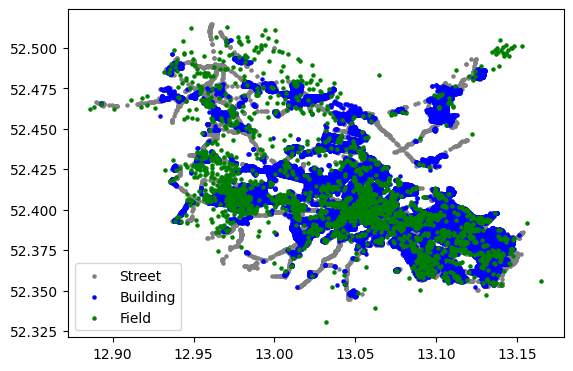

In [6]:
# Convert DataFrame to GeoDataFrame
buildings_gdf = gpd.GeoDataFrame(buildings_df, geometry=gpd.points_from_xy(buildings_df.lon, buildings_df.lat))
areas_gdf = gpd.GeoDataFrame(areas_df, geometry=gpd.points_from_xy(areas_df.lon, areas_df.lat))
roads_gdf = gpd.GeoDataFrame(roads_df, geometry=gpd.points_from_xy(roads_df.lon, roads_df.lat))

# Plot the points
fig, ax = plt.subplots()

# Plot the points on the same axis
roads_gdf.plot(marker='o', color='gray', markersize=5, ax=ax, label='Street')
buildings_gdf.plot(marker='o', color='b', markersize=5, ax=ax, label='Building')
areas_gdf.plot(marker='o', color='g', markersize=5, ax=ax, label='Field')

plt.legend()
plt.show()

In [7]:
clusters = json.load(open('clusters.json'))
clusters_df = pd.DataFrame(clusters)
# add id column
clusters_df['cluster_id'] = clusters_df.index

# Assuming buildings_df has a 'nodeId' column
# Convert the list of nodeIds in each cluster to separate rows
clusters_df = clusters_df.explode('nodes')
clusters_df

,center,nodes,cluster_id
0,"[52.36313381443802, 13.130729044370021]",3,0
0,"[52.36313381443802, 13.130729044370021]",64,0
0,"[52.36313381443802, 13.130729044370021]",98,0
0,"[52.36313381443802, 13.130729044370021]",101,0
0,"[52.36313381443802, 13.130729044370021]",128,0
...,...,...,...
19,"[52.401046233241814, 13.057506034085682]",34870,19
19,"[52.401046233241814, 13.057506034085682]",34871,19
19,"[52.401046233241814, 13.057506034085682]",34872,19
19,"[52.401046233241814, 13.057506034085682]",34893,19


In [8]:
# Merge clusters_df with buildings_df on nodeId
merged_df = pd.merge(clusters_df, buildings_df, left_on='nodes', right_on='id')
merged_df

,center_x,nodes,cluster_id,id,center_y,type,base_area,area,winter_consumption,summer_consumption,lon,lat
0,"[52.36313381443802, 13.130729044370021]",3,0,3,"{'lat': 52.388520400000004, 'lon': 13.04757074...",residential,136.380194,409.140582,{'consumption': {'Electro': [0.326296177545647...,{'consumption': {'Electro': [0.300771895234909...,13.047571,52.388520
1,"[52.36313381443802, 13.130729044370021]",64,0,64,"{'lat': 52.39794410000001, 'lon': 13.055469745...",high_density_residential,110.947468,332.842403,{'consumption': {'Electro': [0.471399823116301...,{'consumption': {'Electro': [0.271023718529156...,13.055470,52.397944
2,"[52.36313381443802, 13.130729044370021]",98,0,98,"{'lat': 52.47393420000001, 'lon': 13.012536560...",high_density_residential,256.451048,769.353144,{'consumption': {'Electro': [1.089623597120008...,{'consumption': {'Electro': [0.626461497453133...,13.012537,52.473934
3,"[52.36313381443802, 13.130729044370021]",101,0,101,"{'lat': 52.40955921999999, 'lon': 13.01851674}",residential,40.614182,121.842546,{'consumption': {'Electro': [0.094412952038834...,{'consumption': {'Electro': [0.099805137634659...,13.018517,52.409559
4,"[52.36313381443802, 13.130729044370021]",128,0,128,"{'lat': 52.40197433749999, 'lon': 13.1017566}",residential,43.446112,130.338335,{'consumption': {'Electro': [0.098491843271309...,{'consumption': {'Electro': [0.112923610634467...,13.101757,52.401974
...,...,...,...,...,...,...,...,...,...,...,...,...
34917,"[52.401046233241814, 13.057506034085682]",34870,19,34870,"{'lat': 52.42391932, 'lon': 12.99735592}",residential,59.846419,179.539257,{'consumption': {'Electro': [0.143185437376411...,{'consumption': {'Electro': [0.131984860177278...,12.997356,52.423919
34918,"[52.401046233241814, 13.057506034085682]",34871,19,34871,"{'lat': 52.45498702, 'lon': 13.10120684}",residential,112.390859,337.172578,{'consumption': {'Electro': [0.261267180940010...,{'consumption': {'Electro': [0.276188874407946...,13.101207,52.454987
34919,"[52.401046233241814, 13.057506034085682]",34872,19,34872,"{'lat': 52.462860019999994, 'lon': 13.10116788}",residential,68.306537,204.919611,{'consumption': {'Electro': [0.158787435807439...,{'consumption': {'Electro': [0.167856226748396...,13.101168,52.462860
34920,"[52.401046233241814, 13.057506034085682]",34893,19,34893,"{'lat': 52.37110548571429, 'lon': 13.082035328...",residential,133.891777,401.675330,{'consumption': {'Electro': [0.303531141932073...,{'consumption': {'Electro': [0.348006813036842...,13.082035,52.371105


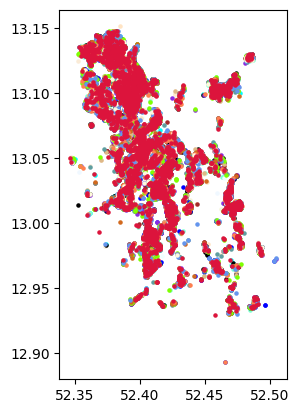

In [9]:


import matplotlib.colors as mcolors

# Convert merged DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df.lat, merged_df.lon))

# Create a new figure and axis
fig, ax = plt.subplots()

# Get a list of unique colors
colors = list(mcolors.CSS4_COLORS.keys())

# Plot each cluster with a different color
for i, cluster in enumerate(gdf['cluster_id'].unique()):
    gdf[gdf['cluster_id'] == cluster].plot(marker='o', color=colors[i % len(colors)], markersize=5, ax=ax, label=f'Cluster {cluster}')

#plt.legend()
plt.show()